In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
L = 1.5
beta = 0.5
N = 32
x = np.linspace(0, L, N+1)
dx = x[1] - x[0]
u = np.zeros(N+1)
U_0 = np.zeros(N+1)

u_exact = lambda x, t: (3*t + 2)*(x - L)
dudx    = lambda t: 3*t + 2
s       = lambda t: u_exact(0, t)
dsdt    = lambda t: 3*(-L)
g       = lambda x, t: 3*(x-L)

U_0[0] = s(0)
U_0[1:] = u_exact(x[1:], 0)

In [3]:
def rhs(u, t):
    N = len(u) - 1
    rhs = np.zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + g(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[N-1] + 2*dx*dudx(t) - 2*u[N]) + g(x[N], t)
    return rhs

In [4]:
def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: np.asarray(f(u, t))
    u = np.zeros((N_t+1, len(U_0)))
    t = np.linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

In [5]:
T = 1.2
dt = 0.001
u, t = ode_FE(rhs, U_0, dt=dt, T=T)

tol = 1E-12
for i in range(0, u.shape[0]):
    diff = abs(u_exact(x, t[i]) - u[i,:]).max()
    assert diff < tol, 'diff=%.16g' % diff
    #print('diff=%g at t=%g' % (diff, t[i]))

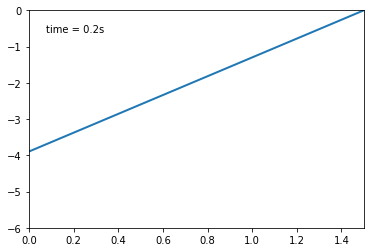

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-6, 0))

line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    y = u[i,:]
    line.set_data(x, y)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())

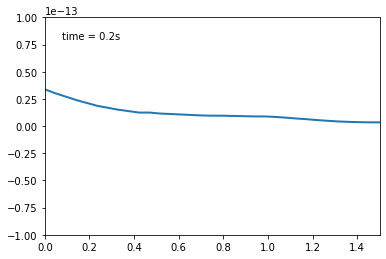

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-tol/10, tol/10))

line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    y = u_exact(x, t[i]) - u[i,:]
    line.set_data(x, y)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())